#  Overall Summary of Schools

Objective of this exercise was to analyze data for student scores as well as budget for several schools so as to ascertain how well the funds are being spent for improving math and reading scores of students in various schools.  After looking at the data, it can be concluded that:

   * As the spend per student increases, passing percentage of students decreases.  Therefore, increasing per capita spend does not assure a better test performance for students.  Another related item to note is that the average test scores in math and reading does not have any impact on how much funds are spent for each student.  This can be seen in the graph below
    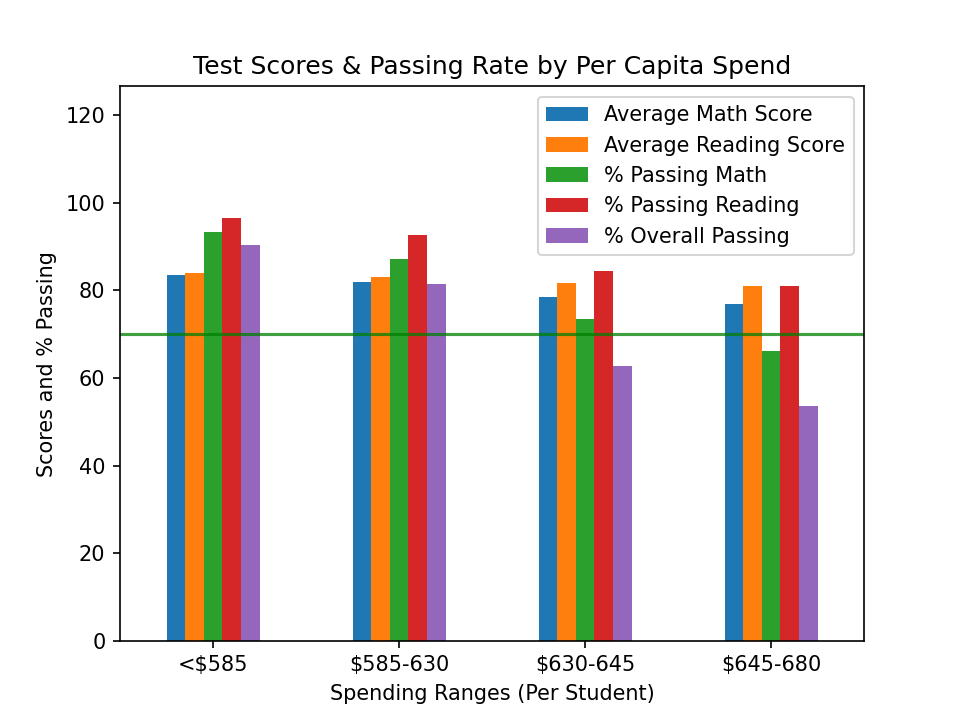
    
   * Charter schools have signficantly less number of students versus district schools, however, overall passing rates for charter school is twice that of district school, even though the math and reading scores are not very different for charter and district schools.  Therefore, one needs to take a deeper dive in other factors for charter schools versus district schools (class environment, teacher qualifications and teaching style, student admission requirements, availability of technology and teaching aids etc) 
   
   * Size of the school also had a negative impact on the performance of its pupil.  As shown in the graph below, larger size schools had a significantly lower overall passing rates.  It appears that there may be an impact of school and/or class size upon student learning which may potentially translates to their test scores.
   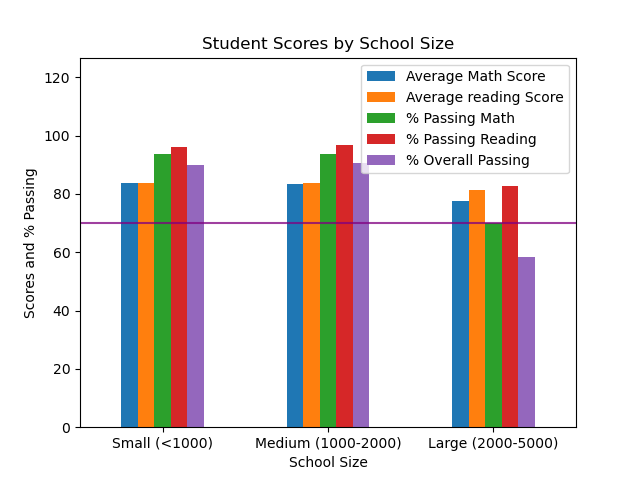
   
  * Finally, a comparison between district and charter schools clearly show that not only Charter schools' math and reading scores were slightly higher versus district schools,  passing rate for math, reading, as well as overall passing percentage for Charter schools was significantly higher versus district schools. This can be seen in the chart below.  Again Charter school's smaller size and potentially limited class size may have an impact on its performance.  Taking a deeper dive into other reasons for Charter school's success is necessary before increasing per capita budget for the schools.  
  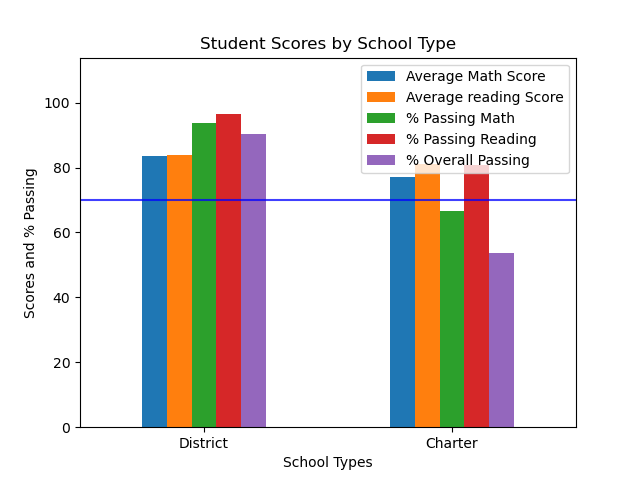
    

In [1]:
#Dependencies and Setup

import pandas as pd

In [2]:
#Files to load
schools_data_load = "Resources/schools_complete.csv"
students_data_load = "Resources/students_complete.csv"

In [3]:
# Read student and school data files and store in pandas data frames
schools_data_df = pd.read_csv(schools_data_load)
students_data_df = pd.read_csv(students_data_load)

In [4]:
# Print schools_data_df

schools_data_df.head()

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [5]:
# print students_data_df
students_data_df

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84
...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90


In [6]:
#Combine both files
school_data_all_df = pd.merge(students_data_df, schools_data_df, how="left", on=["school_name", "school_name"])
school_data_all_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


# Analysis at District Level

In [7]:
# Calculate the total number of unique schools
school_count = len(school_data_all_df["school_name"].unique())
school_count

15

In [8]:
# Calculate the total number of students
student_count = len(school_data_all_df["Student ID"].unique())
student_count

39170

In [9]:
# Calculate the total budget
total_budget = sum(school_data_all_df["budget"].unique())
total_budget

24649428

In [10]:
# Calculate the average (mean) math score
average_math_score = school_data_all_df["math_score"].mean()
average_math_score 

78.98537145774827

In [11]:
# Calculate the average (mean) reading score
average_reading_score = school_data_all_df["reading_score"].mean()
average_reading_score

81.87784018381414

In [12]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_all_df[(school_data_all_df["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage

74.9808526933878

In [13]:
# Calculate the percentage of students who passeed reading 
passing_reading_count = school_data_all_df[(school_data_all_df["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
passing_reading_percentage

85.80546336482001

In [14]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_all_df[
    (school_data_all_df["math_score"] >= 70) & (school_data_all_df["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

# District Summary

In [15]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary_df= pd.DataFrame(
    [{"Total Schools": school_count,
     "Total Students": student_count,
     "Total Budget": total_budget,
     "Average Math Score": average_math_score,
     "Average Reading Score": average_reading_score,
     "% Passing Math": passing_math_percentage,
     "% Passing Reading": passing_reading_percentage,
     "% Overall Passing": overall_passing_rate}])


# Formatting
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


# Analysis at School Level

In [16]:
# Use the code provided to select the school type
school_types = schools_data_df.set_index(["school_name"])["type"]


In [17]:
# Calculate the total student count
per_school_counts =  schools_data_df.set_index(["school_name"])["size"]

In [18]:
# Calculate the total school budget and per capita spending
per_school_budget = school_data_all_df.groupby(["school_name"]).mean()["budget"]
per_school_capita = per_school_budget / per_school_counts


In [19]:
# Calculate the average test scores
per_school_math = school_data_all_df.groupby(["school_name"]).mean()["math_score"]
per_school_reading = school_data_all_df.groupby(["school_name"]).mean()["reading_score"]


In [20]:
# Calculate the number of schools with math scores of 70 or higher
school_passing_math = school_data_all_df[(school_data_all_df["math_score"] >= 70)]
school_passing_math

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
5,5,Bryan Miranda,M,9th,Huang High School,94,94,0,District,2917,1910635
6,6,Sheena Carter,F,11th,Huang High School,82,80,0,District,2917,1910635
8,8,Michael Roth,M,10th,Huang High School,95,87,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [21]:
# Calculate the number of schools with reading scores of 70 or higher
school_passing_reading = school_data_all_df[(school_data_all_df["reading_score"] >= 70)]

In [22]:
# Use the provided code to calculate the schools that passed both math and reading with scores of 70 or higher
passing_math_and_reading = school_data_all_df[
    (school_data_all_df["reading_score"] >= 70) & (school_data_all_df["math_score"] >= 70)
]

In [23]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_passing_math.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100
per_school_passing_reading = school_passing_reading.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100
overall_passing_rate = passing_math_and_reading.groupby(["school_name"]).count()["student_name"] / per_school_counts * 100

In [24]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.

per_school_summary_df= pd.DataFrame({ "School Types": school_types,
                                      "Total Students": per_school_counts,
                                      "Total School Budget": per_school_budget,
                                      "Per Student Budget": per_school_capita,
                                      "Average Math Score": per_school_math,
                                      "Average reading Score": per_school_reading,
                                      "% Passing Math": per_school_passing_math, 
                                      "% Passing Reading": per_school_passing_reading, 
                                      "% Overall Passing": overall_passing_rate})

 # Formatting
per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)
per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary_df                                

,School Types,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


In [25]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
per_school_summary_df.sort_values("% Overall Passing", ascending = False).head()

,School Types,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [26]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
per_school_summary_df.sort_values("% Overall Passing", ascending = True).head()

,School Types,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


In [27]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_all_df[(school_data_all_df["grade"] == "9th")]
tenth_graders = school_data_all_df[(school_data_all_df["grade"] == "10th")]
eleventh_graders = school_data_all_df[(school_data_all_df["grade"] == "11th")]
twelfth_graders = school_data_all_df[(school_data_all_df["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = ninth_graders.groupby(["school_name"]).mean(["math_score"]+["reading_score"])
tenth_graders_scores = tenth_graders.groupby(["school_name"]).mean(["math_score"]+["reading_score"])
eleventh_graders_scores = eleventh_graders.groupby(["school_name"]).mean(["math_score"]+["reading_score"])
twelfth_graders_scores = twelfth_graders.groupby(["school_name"]).mean(["math_score"]+["reading_score"])

 #Use the code to select only the `math_score`.
ninth_grade_math_scores = ninth_graders_scores["math_score"]
tenth_grader_math_scores = tenth_graders_scores["math_score"]
eleventh_grader_math_scores = eleventh_graders_scores.mean()["math_score"]
twelfth_grader_math_scores = twelfth_graders_scores["math_score"]

#Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({"9th": ninth_grade_math_scores, 
                                    "10th": tenth_grader_math_scores, 
                                    "11th": eleventh_grader_math_scores, 
                                    "12th": twelfth_grader_math_scores})

# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,80.575873,76.492218
Cabrera High School,83.094697,83.154506,80.575873,83.277487
Figueroa High School,76.403037,76.539974,80.575873,77.151369
Ford High School,77.361345,77.672316,80.575873,76.179963
Griffin High School,82.044010,84.229064,80.575873,83.356164
Hernandez High School,77.438495,77.337408,80.575873,77.186567
Holden High School,83.787402,83.429825,80.575873,82.855422
Huang High School,77.027251,75.908735,80.575873,77.225641
Johnson High School,77.187857,76.691117,80.575873,76.863248
Pena High School,83.625455,83.372000,80.575873,84.121547


In [28]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_all_df[(school_data_all_df["grade"] == "9th")]
tenth_graders = school_data_all_df[(school_data_all_df["grade"] == "10th")]
eleventh_graders = school_data_all_df[(school_data_all_df["grade"] == "11th")]
twelfth_graders = school_data_all_df[(school_data_all_df["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = ninth_graders.groupby(["school_name"]).mean(["math_score"]+["reading_score"])
tenth_graders_scores = tenth_graders.groupby(["school_name"]).mean(["math_score"]+["reading_score"])
eleventh_graders_scores = eleventh_graders.groupby(["school_name"]).mean(["math_score"]+["reading_score"])
twelfth_graders_scores = twelfth_graders.groupby(["school_name"]).mean(["math_score"]+["reading_score"])

# Use the code to select only the `reading_score`.
ninth_grade_reading_scores = ninth_graders_scores["reading_score"]
tenth_grader_reading_scores = tenth_graders_scores["reading_score"]
eleventh_grader_reading_scores = eleventh_graders_scores.mean()["reading_score"]
twelfth_grader_reading_scores = twelfth_graders_scores["reading_score"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({"9th": ninth_grade_reading_scores, 
                                    "10th": tenth_grader_reading_scores, 
                                    "11th": eleventh_grader_reading_scores, 
                                    "12th": twelfth_grader_reading_scores})


# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,82.559485,80.912451
Cabrera High School,83.676136,84.253219,82.559485,84.287958
Figueroa High School,81.198598,81.408912,82.559485,81.384863
Ford High School,80.632653,81.262712,82.559485,80.662338
Griffin High School,83.369193,83.706897,82.559485,84.013699
Hernandez High School,80.866860,80.660147,82.559485,80.857143
Holden High School,83.677165,83.324561,82.559485,84.698795
Huang High School,81.290284,81.512386,82.559485,80.305983
Johnson High School,81.260714,80.773431,82.559485,81.227564
Pena High School,83.807273,83.612000,82.559485,84.591160


In [29]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [30]:
# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary_df.copy()

In [31]:
# Use `pd.cut` to categorize spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, 
                                                             labels=labels)
school_spending_df

,School Types,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680


In [32]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average reading Score"]
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

# School Summary

In [33]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({"Average Math Score": spending_math_scores, 
                                 "Average Reading Score": spending_reading_scores, "% Passing Math": spending_passing_math, 
                                "% Passing Reading": spending_passing_reading, "% Overall Passing": overall_passing_spending})

# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


In [34]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [35]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary_df["School Size"] = pd.cut(per_school_counts, size_bins, 
                                                             labels=labels)
per_school_summary_df

,School Types,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)


In [36]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average reading Score"]
size_passing_math = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary_df.groupby(["School Size"]).mean()["% Overall Passing"]

In [37]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary_df = pd.DataFrame({"Average Math Score": size_math_scores, 
                              "Average reading Score": size_reading_scores, 
                               "% Passing Math": size_passing_math, 
                              "% Passing Reading": size_passing_reading, 
                               "% Overall Passing": size_overall_passing})

# Display results
size_summary_df

,Average Math Score,Average reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


In [40]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
type_math_scores = per_school_summary_df.groupby(["School Types"]).mean()
type_reading_scores = per_school_summary_df.groupby(["School Types"]).mean()
type_passing_math = per_school_summary_df.groupby(["School Types"]).mean()
type_passing_reading = per_school_summary_df.groupby(["School Types"]).mean()
type_overall_passing = per_school_summary_df.groupby(["School Types"]).mean()

# Use the code provided to select new column data
average_math_score_by_type = type_math_scores["Average Math Score"]
average_reading_score_by_type = type_reading_scores["Average reading Score"]
average_percent_passing_math_by_type = type_passing_math["% Passing Math"]
average_percent_passing_reading_by_type = type_passing_reading["% Passing Reading"]
average_percent_overall_passing_by_type = type_overall_passing["% Overall Passing"]

In [41]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary_df = pd.DataFrame({"Average Math Score": average_math_score_by_type, "Average reading Score": average_reading_score_by_type, 
                               "% Passing Math":  average_percent_passing_math_by_type, 
                                "% Passing Reading": average_percent_passing_reading_by_type, 
                                "% Overall Passing": average_percent_overall_passing_by_type})

#Display results
type_summary_df

,Average Math Score,Average reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Types,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208
